<a href="https://colab.research.google.com/github/kicysh/gci_winter_2020_last_homework/blob/main/final_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Google Drive・Google Colaboratoryで作業する場合
# Google Driveからcolaboratoryにファイルをダウンロード
# ダウンロードしたファイルはランタイムが終了すると削除されます
from google_drive_downloader import GoogleDriveDownloader as GDD
d = {'./data.csv':'1s8Dtp1V_DRpeuD4OBsUd6KoVWTc8dDb9'}
for k, v in d.items():
    GDD.download_file_from_google_drive(file_id=v,
                                        dest_path=k,
                                        unzip=False)

df = pd.read_csv('data.csv', sep=',')

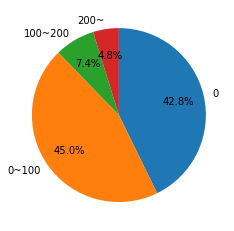

In [2]:
# fig1
import matplotlib.pyplot as plt
x = []
x.append(len(df[df.ovrmou_Mean==0]))
x.append(len(df[(0<df.ovrmou_Mean)&(df.ovrmou_Mean<=100)]))
x.append(len(df[(100<df.ovrmou_Mean)&(df.ovrmou_Mean<=200)]))
x.append(len(df[(200<df.ovrmou_Mean)]))

plt.pie(x,labels=['0','0~100','100~200','200~'],counterclock=False, 
        startangle=90, autopct="%.1f%%",pctdistance=0.7)
plt.savefig('fig1.png')

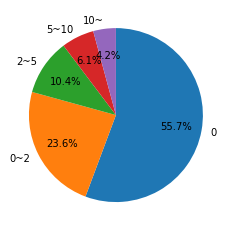

In [3]:
# fig2
import matplotlib.pyplot as plt
x = []
x.append(len(df[df.custcare_Mean==0]))
x.append(len(df[(0<df.custcare_Mean)&(df.custcare_Mean<=2)]))
x.append(len(df[(2<df.custcare_Mean)&(df.custcare_Mean<=5)]))
x.append(len(df[(5<df.custcare_Mean)&(df.custcare_Mean<=10)]))
x.append(len(df[(10<df.custcare_Mean)]))

plt.pie(x,labels=['0','0~2','2~5','5~10','10~'],counterclock=False, 
        startangle=90, autopct="%.1f%%",pctdistance=0.7)
plt.savefig('fig2.png')

In [4]:
target = 'mou_Mean'
target_2 = 'ovrmou_Mean'
df_tmp = df.loc[:,[target,target_2]]

df = df.drop(['rev_Mean','totmrc_Mean','ovrmou_Mean','ovrrev_Mean','vceovr_Mean',
              'datovr_Mean','change_mou','change_rev',],axis=1)

In [5]:
a = df.isnull().sum()
index = set(df.loc[:,a[a<=2839].index].dropna().index)

In [6]:
tmp_col_2 = list()
tmp_col_3 = list()
tmp_col_4 = list()
for col in df.columns:
    if df.loc[index,col].isnull().sum()>0:
        continue
    num = len(df[col].value_counts())
    if num == 2:
        tmp_col_2.append(col)
    elif num == 3:
        tmp_col_3.append(col)
    elif num == 4:
        tmp_col_4.append(col)
print(len(tmp_col_2))
print(len(tmp_col_3))
print(len(tmp_col_4))

12
1
1


In [7]:
df_dropna = df.loc[index,:].dropna(axis=1)
df_dropna['dwllsize'] = df.loc[index,'dwllsize'].fillna('dwllsize_NaN')
df_dropna['hnd_webcap'] = df.loc[index,'hnd_webcap'].fillna('hnd_webcap_NaN')
df_dropna['ownrent'] = df.loc[index,'ownrent'].fillna('ownrent_NaN')
df_dropna['dwlltype'] = df.loc[index,'dwlltype'].fillna('dwlltype_NaN')
df_dropna['infobase'] = df.loc[index,'infobase'].fillna('infobase_NaN')
df_dropna['HHstatin'] = df.loc[index,'HHstatin'].fillna('HHstatin_NaN')
df_dropna['prizm_social_one'] = df.loc[index,'prizm_social_one'].fillna('prizm_social_one_NaN')
print(df_dropna.shape)

df_dropna['crclscod'] = df_dropna['crclscod'].apply(lambda x :x[0])
tmp = df_dropna.crclscod.value_counts()
tmp_index = df_dropna[df_dropna.crclscod.isin(tmp[tmp<=100].index)].index
df_dropna.loc[tmp_index,'crclscod'] = 'others' 

tmp = df_dropna.ethnic.value_counts()
tmp_index = df_dropna[df_dropna.ethnic.isin(tmp[tmp<=500].index)].index
df_dropna.loc[tmp_index,'ethnic'] = 'others' 

df_dropna['drop_sum_Mean'] =  df_dropna.drop_dat_Mean + df_dropna.drop_vce_Mean 
df_dropna['block_sum_Mean'] =  df_dropna.blck_dat_Mean + df_dropna.blck_vce_Mean 
df_dropna['block_and_drop_sum_mean'] = df_dropna.drop_sum_Mean + df_dropna.block_sum_Mean

df_dropna['off_peak_data'] = df_dropna.mou_opkd_Mean * df_dropna.opk_dat_Mean
df_dropna['off_peak_voice'] = df_dropna.mou_opkv_Mean * df_dropna.opk_vce_Mean
df_dropna['off_peak_use'] = df_dropna.off_peak_data + df_dropna.off_peak_voice

df_dropna['peak_data'] = df_dropna.mou_pead_Mean * df_dropna.peak_dat_Mean
df_dropna['peak_voice'] = df_dropna.mou_peav_Mean * df_dropna.peak_vce_Mean
df_dropna['peak_use'] = df_dropna.peak_data + df_dropna.off_peak_voice

df_dropna['complete_per_attempt'] = df_dropna.complete_Mean/df_dropna.attempt_Mean

df_dropna['eqpyears'] = df_dropna.eqpdays//365
df_dropna['eqpmonths'] = df_dropna.eqpdays//30

# kids
df_dropna.kid0_2 = df_dropna.kid0_2.map({'U':0,'Y':1})
df_dropna.kid3_5 = df_dropna.kid3_5.map({'U':0,'Y':1})
df_dropna.kid6_10 = df_dropna.kid6_10.map({'U':0,'Y':1})
df_dropna.kid11_15 = df_dropna.kid11_15.map({'U':0,'Y':1})
df_dropna.kid16_17 = df_dropna.kid16_17.map({'U':0,'Y':1})
df_dropna['kids'] = df_dropna.kid0_2 + df_dropna.kid3_5 + df_dropna.kid6_10 +\
                    df_dropna.kid11_15 + df_dropna.kid16_17
df_dropna['adults'] = df.loc[index,'adults'].values
for i in range(max(df_dropna.kids)+1):
    tmp_index = set(df_dropna[df_dropna.adults.isnull()].index) &  \
                set(df_dropna[df_dropna.kids==i].index)
    df_dropna.loc[tmp_index,'adults'] = df_dropna[df_dropna.kids==i].adults.median()
#df_dropna.adults = df_dropna.adults.fillna(1)
df_dropna['family'] = df_dropna.kids + df_dropna.adults

dummy_col = ['new_cell','crclscod','asl_flag','dualband',
             'refurb_new','marital','ethnic',
             'kid0_2','kid3_5','kid6_10','kid11_15','kid16_17',
             'creditcd','area',
             'Customer_ID','churn',
             'dwllsize','hnd_webcap','ownrent','dwlltype','infobase','HHstatin','prizm_social_one']
ctg_cols = df_dropna.drop(set(dummy_col),axis=1).columns
ctg_cols = set(ctg_cols) - set([target])
for col in ctg_cols:
    df_dropna['{}_ctg'.format(col)] =  pd.qcut(df_dropna[col],10,duplicates='drop')
for col in ctg_cols:
    df_dropna['{}_ctg_5'.format(col)] =  pd.qcut(df_dropna[col],5,duplicates='drop')
for col in ctg_cols:
    df_dropna['{}__value_ctg'.format(col)] =  pd.cut(df_dropna[col],10,duplicates='drop')

print(df_dropna.shape)

(94391, 88)
(94391, 340)


In [8]:
import lightgbm.sklearn as lgbm
from sklearn.model_selection import train_test_split

dummy_col = ['new_cell','crclscod','asl_flag','dualband',
             'refurb_new','marital','ethnic',
             #'kid0_2','kid3_5','kid6_10','kid11_15','kid16_17',
             'creditcd','area',#'churn',
             'dwllsize','hnd_webcap','ownrent','dwlltype','infobase','HHstatin','prizm_social_one']

dummy_col = set(dummy_col) | set(['{}_ctg'.format(col) for col in ctg_cols])
dummy_col = set(dummy_col) | set(['{}_ctg_5'.format(col) for col in ctg_cols])
dummy_col = set(dummy_col) | set(['{}__value_ctg'.format(col) for col in ctg_cols])
dummy_col = set(dummy_col) - set([target])
X = pd.get_dummies(df_dropna.drop([target,'Customer_ID'],axis=1),columns=dummy_col).astype(np.float64)
#target_2 = 'ovrmou_Mean'
y = df_tmp.loc[index,:].astype(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X.shape

(94391, 1793)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=9)
lg = lgbm.LGBMRegressor(metric='mae',random_state=9,n_estimators=10000)
fit_params = {'eval_set':[(X_test, y_test.iloc[:,0])], 
              'early_stopping_rounds':250,
              'verbose':500}
lg.fit(X_train,y_train.iloc[:,0],**fit_params)
y_pred = lg.predict(X_test)

Training until validation scores don't improve for 250 rounds.
[500]	valid_0's l1: 45.5287
Early stopping, best iteration is:
[284]	valid_0's l1: 45.4249


ovrmou_Mean


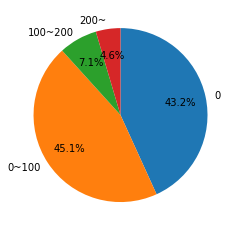

In [13]:
# fig3
tag = target_2
x = []
x.append(len(y_test[y_test[tag]==0]))
x.append(len(y_test[(0<y_test[tag])&(y_test[tag]<=100)]))
x.append(len(y_test[(100<y_test[tag])&(y_test[tag]<=200)]))
x.append(len(y_test[(200<y_test[tag])]))

plt.pie(x,labels=['0','0~100','100~200','200~'],counterclock=False, 
        startangle=90, autopct="%.1f%%",pctdistance=0.7)
plt.savefig('fig3.png')
print(tag)

pred


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


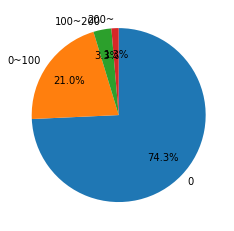

In [14]:
# fig4
tag = target
y_test['pred'] = y_test[tag]-y_pred-20
tag = 'pred'
x = []
x.append(len(y_test[y_test[tag]<0]))
x.append(len(y_test[(0<y_test[tag])&(y_test[tag]<=100)]))
x.append(len(y_test[(100<y_test[tag])&(y_test[tag]<=200)]))
x.append(len(y_test[(200<y_test[tag])]))

plt.pie(x,labels=['0','0~100','100~200','200~'],counterclock=False, 
        startangle=90, autopct="%.1f%%",pctdistance=0.7)
plt.savefig('fig4.png')
print(tag)